In [47]:
import re
from datetime import datetime
import os

# Define the directory path where the files are stored
directory_path = 'Z:/Lab Data/Qudit_Ramsey_raw_data/Raw_data_PD/'

# Function to parse the filename and extract relevant information
def parse_filename(filename):
    pattern = (r'Ramsey_experiment_\[\[([+-]?\d+), ([+-]?\d+), ([+-]?\d+)\], '
               r'\[([+-]?\d+), ([+-]?\d+), ([+-]?\d+)\]\]_(\d+)_us_(\d{8})_(\d{4})\.txt')
    match = re.search(pattern, filename)
    if match:
        num1 = int(match.group(1))  # First number in the first triplet
        num2 = int(match.group(2))  # Second number in the first triplet
        num3 = int(match.group(3))  # Third number in the first triplet
        num4 = int(match.group(4))  # First number in the second triplet
        num5 = int(match.group(5))  # Second number in the second triplet
        num6 = int(match.group(6))  # Third number in the second triplet
        wait_time = int(match.group(7))  # Wait time in microseconds
        date_str = match.group(8) + match.group(9)
        date_time = datetime.strptime(date_str, '%Y%m%d%H%M')  # Date and time
        transition_str = f"p{num1}{num2}{num3}_p{num4}{num5}{num6}"  # Create transition string
        return num1, num2, num3, num4, num5, num6, wait_time, date_time, transition_str
    else:
        return None, None, None, None, None, None, None, None, None

# Function to extract raw data filenames from the content of a file
def extract_raw_data_filenames(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extract the raw data filenames from the last line and convert to a list
    raw_data_filenames_line = lines[-1].strip()
    raw_data_filenames = [name.strip().strip("'\"") for name in raw_data_filenames_line.strip('[]').split(',')]

    return raw_data_filenames

# Search for files with the same date-time pattern, returning two lists:
# 1) wait_time_list
# 2) raw_file_paths_list (list of lists)
def search_files_by_datetime(directory, target_date_times):
    # Prepare empty lists
    wait_time_list = []
    raw_file_paths_list = []
    
    # Variables to store the final extracted numbers from the parsed filenames (for output)
    num1_, num2_, num3_, num4_, num5_, num6_ = None, None, None, None, None, None
    
    # Loop over all files in the directory
    for filename in os.listdir(directory):
        # Only process files that match the expected pattern
        if filename.startswith('Ramsey_experiment'):
            num1, num2, num3, num4, num5, num6, wait_time, date_time, transition_str = parse_filename(filename)
            # Check if the current file's date-time matches any in the target date-times
            if date_time in target_date_times:
                # Store these for returning later (last file's values will be returned)
                num1_, num2_, num3_, num4_, num5_, num6_ = num1, num2, num3, num4, num5, num6

                # Parse the raw data filenames for this file
                file_path = os.path.join(directory, filename)
                raw_data_filenames = extract_raw_data_filenames(file_path)
                
                # Convert the raw data filenames to their full paths
                Z_drive_raw_data = 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data\\'
                raw_data_filepaths = [Z_drive_raw_data + raw_filename for raw_filename in raw_data_filenames]
                
                # Append the wait_time and corresponding list of raw data paths
                wait_time_list.append(wait_time)
                raw_file_paths_list.append(raw_data_filepaths)
    
    # Return the two lists along with the final transition parameters
    return wait_time_list, raw_file_paths_list, num1_, num2_, num3_, num4_, num5_, num6_

def extract_datetime_strings(file_path, target_entry):
    with open(file_path, 'r') as file:
        for line in file:
            stripped_line = line.strip()
            
            # Find the index of the first closing bracket (end of the target entry)
            end_idx = stripped_line.index(']]') + 2
            
            # Extract the first part (the target entry) and evaluate it
            first_entry = eval(stripped_line[:end_idx])
            print(first_entry)
            # Check if the first entry matches the target entry
            if first_entry == target_entry:
                components = stripped_line.split(', [')
                last_entry = '[' + components[-1]
                print(last_entry)
                date_time_list = eval(last_entry)
                
                return date_time_list
    
    # If no matching entry is found, return None
    return None

# Example usage
if __name__ == "__main__":
    # This assumes your text file's content is formatted so that
    # extract_datetime_strings can parse out the matching date strings
    dt_list = extract_datetime_strings('T2_data_Bused_qubit.txt', [[-1, 4, -3], [-1, 4, -3]])
    
    target_date_times = []
    for dt_string in dt_list:
        target_date_times.append(datetime.strptime(dt_string, '%Y%m%d_%H%M'))
    
    # Instead of a dictionary, we now get parallel lists:
    # wait_time_list[i] => raw_file_paths_list[i]
    wait_time_list, raw_file_paths_list, num1, num2, num3, num4, num5, num6 = search_files_by_datetime(
        directory_path, 
        target_date_times
    )

    # Output the results
    print(f"Transition: p{num1}{num2}{num3}_p{num4}{num5}{num6} "
          f"(mF1: {num1}, F1: {num2}, mF2: {num3}, mF3: {num4}, F2: {num5}, mF4: {num6})")
    
    print("\nWait times and corresponding raw data file paths (each entry is its own sub-list):")
    for wt, fp_list in zip(wait_time_list, raw_file_paths_list):
        print(f"\nWait time: {wt} us")
        for fp in fp_list:
            print(f"  {fp}")


[[0, 2, 0], [0, 3, 2]]
[[0, 2, 0], [0, 2, 2]]
[[0, 2, 0], [0, 4, -1]]
[[0, 2, 0], [0, 4, 0]]
[[0, 2, 0], [0, 4, 1]]
[[0, 2, 0], [0, 3, -1]]
[[0, 2, 0], [0, 3, 0]]
[[0, 2, 0], [0, 3, 1]]
[[0, 3, 2], [0, 4, -2]]
[[0, 3, 2], [0, 4, -1]]
[[0, 3, 2], [0, 4, 0]]
[[0, 3, 2], [0, 4, 1]]
[[0, 3, 2], [0, 3, -1]]
[[0, 3, 2], [0, 3, 0]]
[[0, 3, 2], [0, 3, 1]]
[[-1, 2, 1], [-1, 3, 1]]
[[-2, 3, -2], [-2, 2, -1]]
[[0, 2, 2], [0, 3, 2]]


TypeError: 'NoneType' object is not iterable

In [10]:
import re
from datetime import datetime
import os

# Define the directory path where the files are stored
directory_path = 'Z:/Lab Data/Qudit_Ramsey_raw_data/Raw_data_PD/'
# Z:\Lab Data\Qudit_Ramsey_raw_data\Good_ramsey_phase_scans_for_phase_drifts
def parse_filename(filename):
    pattern = (
        r'Ramsey_experiment_\[\[([+-]?\d+), ([+-]?\d+), ([+-]?\d+)\], '
        r'\[([+-]?\d+), ([+-]?\d+), ([+-]?\d+)\]\]_(\d+)_us_(\d+)_(\d{8})_(\d{4})\.txt'
    )
    match = re.search(pattern, filename)
    if match:
        num1 = int(match.group(1))
        num2 = int(match.group(2))
        num3 = int(match.group(3))
        num4 = int(match.group(4))
        num5 = int(match.group(5))
        num6 = int(match.group(6))
        wait_time = int(match.group(7))
        extra_param = int(match.group(8))
        date_str = match.group(9) + match.group(10)  # "YYYYMMDDHHMM"
        date_time = datetime.strptime(date_str, '%Y%m%d%H%M')
        transition_str = f"p{num1}{num2}{num3}_p{num4}{num5}{num6}"

        return (
            num1, num2, num3,
            num4, num5, num6,
            wait_time,
            extra_param,
            date_time,
            transition_str
        )
    else:
        # Return exactly 10 items to match the unpacking
        return (None, None, None, None, None, None, None, None, None, None)



def extract_raw_data_filenames(file_path):
    """
    Reads the last line of the given text file (e.g., "Ramsey_experiment...txt"),
    which should contain raw data filenames in a Python-list format.
    Returns those filenames as a list of strings.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()

    raw_data_filenames_line = lines[-1].strip()

    # Split the last line, which is e.g. ['file1', 'file2']
    raw_data_filenames = [
        name.strip().strip("'\"") for name in raw_data_filenames_line.strip('[]').split(',')
    ]
    return raw_data_filenames


def search_files_by_date_and_transitions(directory, transitions, target_dates):
    """
    Searches the given `directory` for files whose transition parameters match
    `transitions` = [[mF1, F1, mF2], [mF3, F2, mF4]] and whose date (YYYYMMDD)
    is in the set `target_dates` (each element is a datetime.date object).

    Returns:
       1) wait_time_list         (list of int wait_times in microseconds)
       2) raw_file_paths_list    (list of lists containing full paths to raw data files)
       3) final transition parameters from the last matching file:
          (num1, num2, num3, num4, num5, num6, extra_param)
          as derived from the final file that matched in the directory.

    If you need to use `extra_param` for filtering, adapt the code below.
    """
    (desired_num1, desired_num2, desired_num3), (desired_num4, desired_num5, desired_num6) = transitions

    wait_time_list = []
    raw_file_paths_list = []

    # We'll store these so we can report at the end
    num1_, num2_, num3_, num4_, num5_, num6_, extra_ = (None,)*7

    for filename in os.listdir(directory):
        if filename.startswith('Ramsey_experiment'):
            (num1, num2, num3,
             num4, num5, num6,
             wait_time, extra_param,
             date_time, transition_str) = parse_filename(filename)

            # Skip if parse failed
            if date_time is None:
                continue

            # Check transitions
            same_transition = (
                num1 == desired_num1
                and num2 == desired_num2
                and num3 == desired_num3
                and num4 == desired_num4
                and num5 == desired_num5
                and num6 == desired_num6
            )

            # Compare date only, ignoring time
            if same_transition and (date_time.date() in target_dates):
                # Update final transitions so we can print them later
                num1_, num2_, num3_ = num1, num2, num3
                num4_, num5_, num6_ = num4, num5, num6
                extra_ = extra_param

                # Extract raw data filenames
                file_path = os.path.join(directory, filename)
                raw_data_filenames = extract_raw_data_filenames(file_path)

                # Convert to full paths
                Z_drive_raw_data = 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data\\'
                raw_data_filepaths = [
                    os.path.join(Z_drive_raw_data, raw_filename)
                    for raw_filename in raw_data_filenames
                ]

                # Collect results
                wait_time_list.append(wait_time)
                raw_file_paths_list.append(raw_data_filepaths)

    return wait_time_list, raw_file_paths_list, num1_, num2_, num3_, num4_, num5_, num6_, extra_


if __name__ == "__main__":
    # EXAMPLE USAGE

    # 1) The transitions you want to match
    transitions_to_match = [[0, 2, 0], [0, 2, -2]]

    # 2) Define a list of date strings in 'YYYYMMDD' format
    date_strings = [
        # "20250314",
        "20250213"
        # '20250218',
        # '20250221'
    ]

    # Convert them to a set of date objects
    target_dates = set(datetime.strptime(ds, '%Y%m%d').date() for ds in date_strings)

    # 3) Perform the search
    (
        wait_time_list,
        raw_file_paths_list,
        num1, num2, num3,
        num4, num5, num6,
        extra_val
    ) = search_files_by_date_and_transitions(
        directory_path,
        transitions_to_match,
        target_dates
    )

    # 4) Print out the results
    print(f"Transition: p{num1}{num2}{num3}_p{num4}{num5}{num6}")
    print(f"(mF1={num1}, F1={num2}, mF2={num3}, mF3={num4}, F2={num5}, mF4={num6}, extra={extra_val})")

    print("\nWait times and corresponding raw data file paths:")
    for wt, fp_list in zip(wait_time_list, raw_file_paths_list):
        print(f"\nWait time: {wt} us")
        for fp in fp_list:
            print(f"  {fp}")


Transition: p020_p02-2
(mF1=0, F1=2, mF2=0, mF3=0, F2=2, mF4=-2, extra=1)

Wait times and corresponding raw data file paths:

Wait time: 10 us
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_02\\2025_02_13\\qudit_ramsey_scan_bused_015
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_02\\2025_02_13\\qudit_ramsey_scan_bused_016
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_02\\2025_02_13\\qudit_ramsey_scan_bused_017
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_02\\2025_02_13\\qudit_ramsey_scan_bused_018
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_02\\2025_02_13\\qudit_ramsey_scan_bused_019
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_02\\2025_02_13\\qudit_ramsey_scan_bused_020
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_02\\2025_02_13\\qudit_ramsey_scan_bused_021
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_02\\2025_02_1

In [12]:
import numpy as np
import json

# --------------------------------
# Existing Functions (Unchanged)
# --------------------------------

def get_shelving_threshold(counts):
    data_sorted = np.sort(counts, axis=None)
    # Truncate outliers at the start and end
    data_sorted = data_sorted[100:-100]
    if len(data_sorted) > 1000:
        data_sorted = data_sorted[0:-1:round(data_sorted.size / (len(counts) * 0.0250167))]
    data_sorted_diff = data_sorted[1:-1] - data_sorted[0:-2]
    data_diff_max = max(data_sorted_diff)
    data_diff_maxind = np.argmax(data_sorted_diff)
    threshold = data_diff_max / 2 + data_sorted[data_diff_maxind]
    return threshold, data_sorted

def process_raw_data_files(raw_data_filepaths):
    arrays = []
    # Read and process the data from all raw data files
    for file_path in raw_data_filepaths:
        with open(file_path, 'r') as file:
            for line in file:
                data = json.loads(line)
                arrays.append(data[0]["0"])
    # Convert to numpy array
    hist_data = np.array(arrays)
    
    # Flatten the hist_data and compute shelving threshold
    flat_hist_data = hist_data.flatten()
    # print(flat_hist_data)
    # plt.figure()
    # plt.hist(flat_hist_data, bins=max(flat_hist_data), edgecolor='black')
    # plt.show()
    threshold, _ = get_shelving_threshold(flat_hist_data)
    # print(threshold)
    # Prepare for further processing (3D array)
    arrays_3d = []
    for file_path in raw_data_filepaths[:]:
        arrays = []
        with open(file_path, 'r') as file:
            for line in file:
                data = json.loads(line)
                arrays.append(data[0]["0"][:])
        if len(arrays) == 0:
            arrays = list(np.full((100, 4), 40))  # fallback if no data
        arrays_3d.append(arrays)
    # print(arrays_3d)
    bool_array = np.array(arrays_3d) > threshold
    result_matrix = np.full(bool_array.shape, False, dtype=bool)
    # Identify the first occurrence of shelving (True value)
    for matrix_index in range(bool_array.shape[0]):
        for row_index in range(bool_array.shape[1]):
            true_indices = np.where(bool_array[matrix_index, row_index, :])
            if true_indices[0].size > 0:
                first_true_index = true_indices[0]
                # We exclude cases where the first-true index is 0 or 1
                # print(first_true_index)
                if first_true_index[0] != 0: #and first_true_index[0] != 1:
                    result_matrix[matrix_index, row_index, first_true_index[0]] = True

    # Filter data and compute percentages used
    filtered_data_array = []
    percentage_data_used = []
    num_points = bool_array.shape[0]  # Determine the number of data points
    for i in range(num_points):
        data = result_matrix[i]
        rows_with_any_true = data.any(axis=1)
        filtered_data = data[rows_with_any_true]
        filtered_data_array.append(filtered_data)
        percentage_data_used.append(filtered_data.shape[0] / data.shape[0])
    # print(filtered_data_array)
    # Compute ket data by averaging the filtered data
    def find_errors(num_SD, full_data_array, exp_num):
        upper_error = ((full_data_array + (num_SD**2 / (2 * exp_num))) /
                       (1 + (num_SD**2 / exp_num))) + np.sqrt(
                           ((full_data_array *
                             (1 - full_data_array) * num_SD**2) / exp_num) +
                           (num_SD**4 / (4 * exp_num**2))
                       ) / (1 + (num_SD**2 / exp_num))

        lower_error = ((full_data_array + (num_SD**2 / (2 * exp_num))) /
                       (1 + (num_SD**2 / exp_num))) - np.sqrt(
                           ((full_data_array *
                             (1 - full_data_array) * num_SD**2) / exp_num) +
                           (num_SD**4 / (4 * exp_num**2))
                       ) / (1 + (num_SD**2 / exp_num))

        return lower_error, upper_error

    ket_data = []
    exp_num_list = []
    for filtered_data in filtered_data_array:
        # Average across the 3rd dimension's index=2
        ket_data.append(np.mean(filtered_data, axis=0)[1])
        exp_num_list.append(len(filtered_data))
        
    lower_error, upper_error = find_errors(1, np.array(ket_data), np.array(exp_num_list))
    
    return ket_data, lower_error, upper_error


# ------------------------------------------------
# New Function Using Parallel Lists (NOT a dict)
# ------------------------------------------------
def process_all_wait_times_in_lists(wait_time_list, raw_file_paths_list):
    """
    Instead of passing a dictionary {wait_time: [file1, file2, ...]},
    we pass in two parallel lists:
      1) wait_time_list[i] 
      2) raw_file_paths_list[i]

    We will return four separate lists:
      - processed_wait_times[i]
      - ket_data_list[i]
      - lower_error_list[i]
      - upper_error_list[i]

    Each index i in these return lists corresponds to the same data set.
    """
    processed_wait_times = []
    ket_data_list = []
    lower_error_list = []
    upper_error_list = []
    
    # Iterate over each index in the parallel lists
    for i, wait_time in enumerate(wait_time_list):
        # Fetch corresponding raw data file paths
        raw_data_filepaths = raw_file_paths_list[i]

        # Process the raw data
        ket_data, lower_error, upper_error = process_raw_data_files(raw_data_filepaths)

        # Store results in the four lists
        processed_wait_times.append(wait_time)

        # ket_data is already a list of floats
        # lower_error and upper_error are arrays (same shape as ket_data)
        # The original code does:
        #   final_lower = ket_data - lower_error
        #   final_upper = upper_error - ket_data
        # so we replicate that logic
        ket_data_arr = np.array(ket_data)
        final_lower_error = np.abs(ket_data_arr - np.array(lower_error))
        final_upper_error = np.abs(np.array(upper_error) - ket_data_arr)

        ket_data_list.append(ket_data)
        lower_error_list.append(final_lower_error)
        upper_error_list.append(final_upper_error)

    return processed_wait_times, ket_data_list, lower_error_list, upper_error_list



(
    processed_wait_times, 
    ket_data_list, 
    lower_error_list, 
    upper_error_list
) = process_all_wait_times_in_lists(wait_time_list, raw_file_paths_list)

# Printing example output
print("\nProcessed Data in Parallel Lists:")
for wt, ket_vals, le_vals, ue_vals in zip(processed_wait_times, ket_data_list, lower_error_list, upper_error_list):
    print(f"\nWait Time: {wt} us")
    print(f"Ket Data (list): {ket_vals}")
    print(f"Lower Error (array): {le_vals}")
    print(f"Upper Error (array): {ue_vals}")



Processed Data in Parallel Lists:

Wait Time: 10 us
Ket Data (list): [0.0851063829787234, 0.05154639175257732, 0.28, 0.57, 0.8, 0.95, 0.9595959595959596, 0.8061224489795918, 0.45918367346938777, 0.12244897959183673, 0.08080808080808081]
Lower Error (array): [0.02459279 0.01822331 0.04255191 0.04995982 0.04406926 0.02659473
 0.02481571 0.04294486 0.04967359 0.02935185 0.02338259]
Upper Error (array): [0.03332739 0.02737543 0.04690834 0.04857368 0.03781926 0.01768384
 0.01562379 0.03676057 0.05049816 0.03697914 0.03176643]

Wait Time: 100 us
Ket Data (list): [0.07216494845360824, 0.17346938775510204, 0.45, 0.6122448979591837, 0.75, 0.96, 0.8383838383838383, 0.5959595959595959, 0.30303030303030304, 0.1111111111111111, 0.05102040816326531]
Lower Error (array): [0.02213519 0.03490039 0.0490099  0.05011619 0.04563266 0.02457797
 0.04034888 0.05003951 0.04402931 0.02777778 0.01803987]
Upper Error (array): [0.03086652 0.04149697 0.05       0.04784862 0.04068217 0.01546906
 0.0335812  0.048120

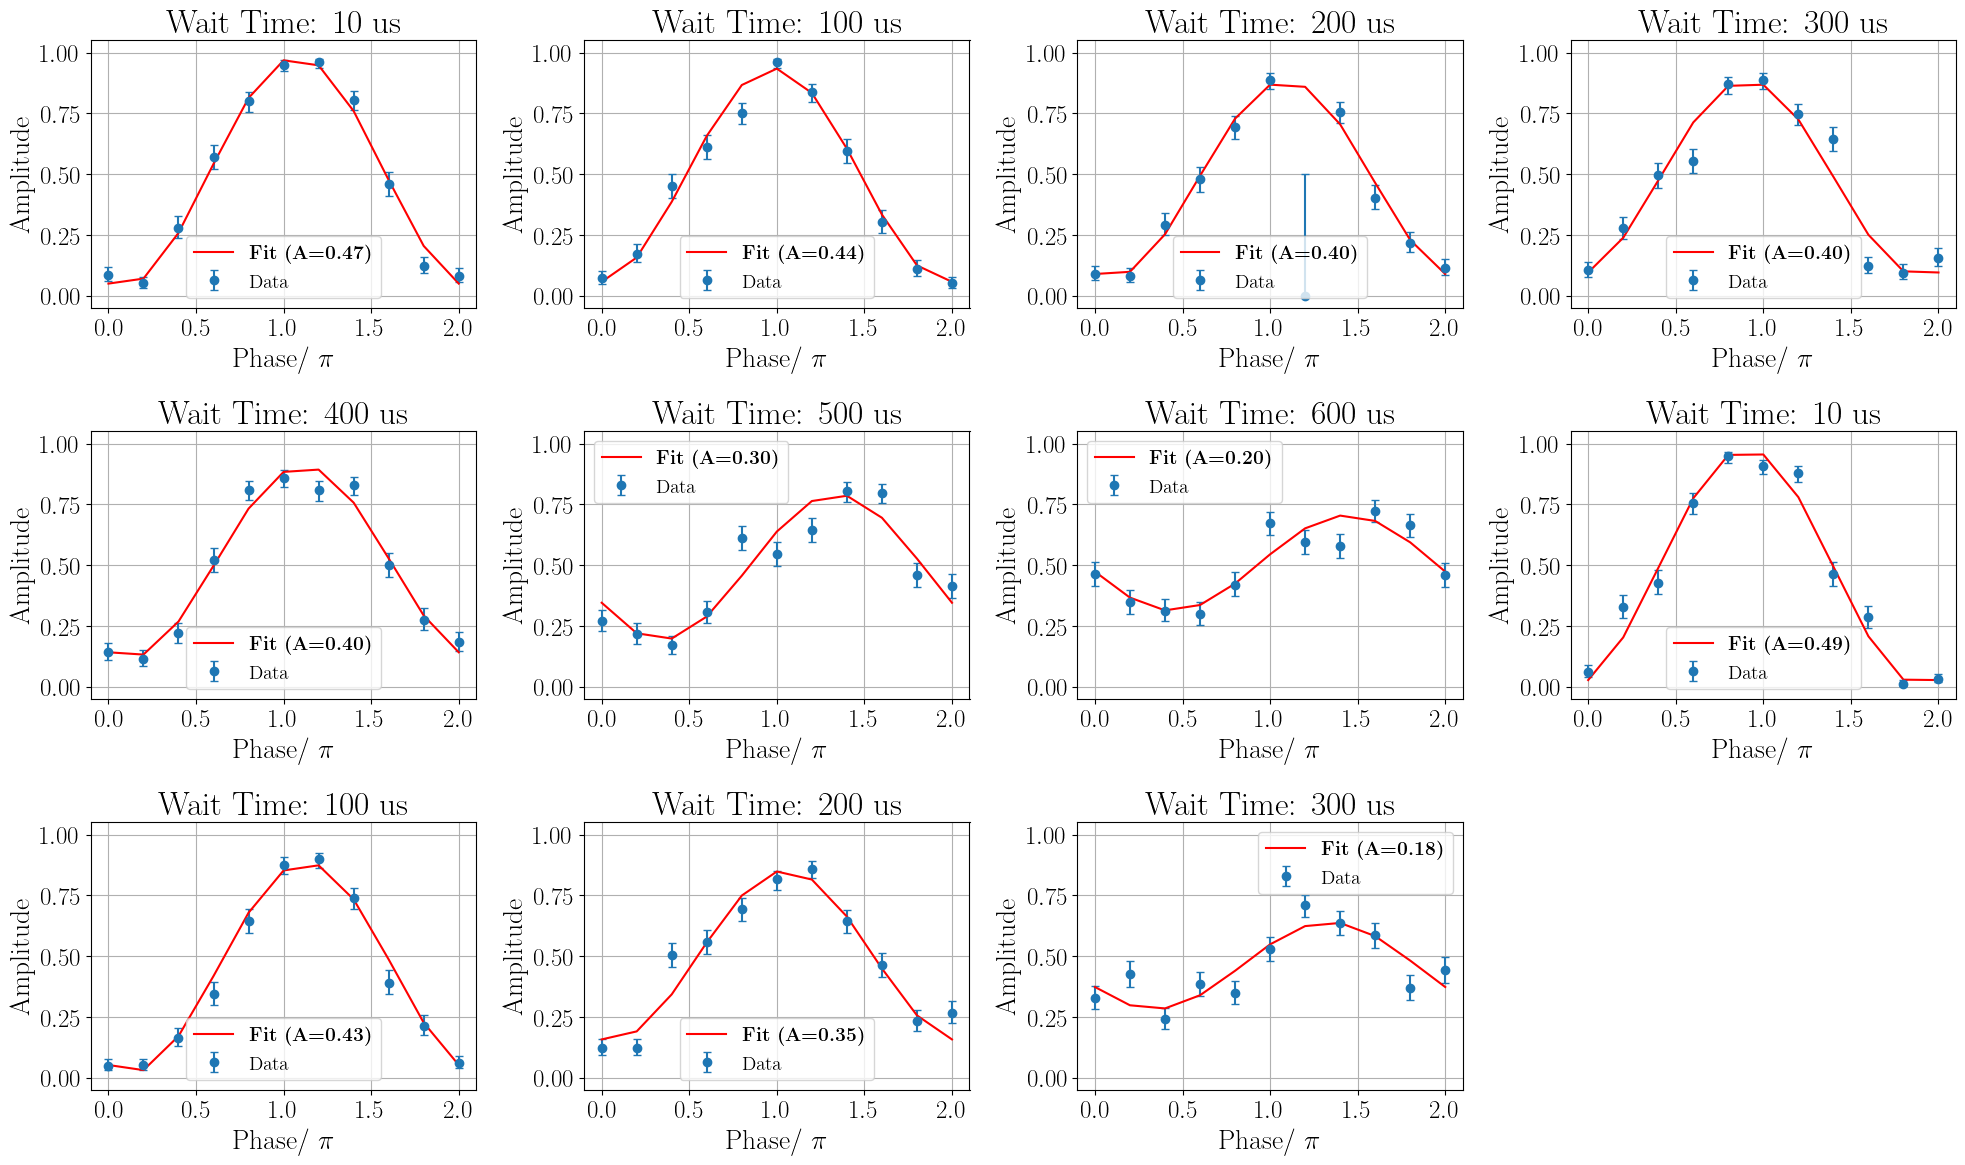


Fitted Results (Lists):
Wait Time: 10 us
  Params (A, phi, offset) = -0.473, -0.244, 0.509
  Amplitude (2*|A|) = 0.946
  Phase = -0.244 ± 0.037
Wait Time: 100 us
  Params (A, phi, offset) = -0.439, 0.063, 0.496
  Amplitude (2*|A|) = 0.878
  Phase = 0.063 ± 0.045
Wait Time: 200 us
  Params (A, phi, offset) = -0.405, -0.278, 0.479
  Amplitude (2*|A|) = 0.810
  Phase = -0.278 ± 0.050
Wait Time: 300 us
  Params (A, phi, offset) = -0.403, 0.295, 0.482
  Amplitude (2*|A|) = 0.807
  Phase = 0.295 ± 0.047
Wait Time: 400 us
  Params (A, phi, offset) = -0.395, -0.353, 0.513
  Amplitude (2*|A|) = 0.790
  Phase = -0.353 ± 0.048
Wait Time: 500 us
  Params (A, phi, offset) = -0.299, -1.060, 0.492
  Amplitude (2*|A|) = 0.599
  Phase = -1.060 ± 0.066
Wait Time: 600 us
  Params (A, phi, offset) = 0.197, 1.753, 0.509
  Amplitude (2*|A|) = 0.393
  Phase = 1.753 ± 0.101
Wait Time: 10 us
  Params (A, phi, offset) = -0.487, 0.308, 0.491
  Amplitude (2*|A|) = 0.973
  Phase = 0.308 ± 0.034
Wait Time: 100 us


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True
# Set general font size
rcParams['font.size'] = 18

# Axis title (i.e., the title of the figure or subplot)
rcParams['axes.titlesize'] = 24
rcParams['axes.titleweight'] = 'bold'  # 'bold' for bold titles

# Axis labels
rcParams['axes.labelsize'] = 20

# Tick labels
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18

# Legend
rcParams['legend.fontsize'] = 12
rcParams['legend.title_fontsize'] = 12  # Title of the legend, if used

# Figure title (if using suptitle)
rcParams['figure.titlesize'] = 18
rcParams['legend.fontsize'] = 14
# Fixed frequency: 2π
def sine_function(t, A, phi, offset):
    return A * np.cos(2 * np.pi/10 * t + phi) + offset

def fit_sine_curve(ket_data, lower_error, upper_error):
    if len(ket_data) == 5:
        t = 2*np.arange(len(ket_data))
    else:
        t = np.arange(len(ket_data))
    valid_indices = ~np.isnan(ket_data) & ~np.isnan(lower_error) & ~np.isnan(upper_error)
    t_valid = t[valid_indices]
    ket_data_valid = np.array(ket_data)[valid_indices]
    lower_error_valid = np.array(lower_error)[valid_indices]
    upper_error_valid = np.array(upper_error)[valid_indices]

    sigma = (upper_error_valid + lower_error_valid) / 2.0
    if np.any(sigma <= 0):
        nonzero = sigma[sigma > 0]
        replacement = np.min(nonzero) if len(nonzero) > 0 else 1.0
        sigma[sigma <= 0] = replacement

    # Now we have only three parameters: A, phi, offset
    initial_guess = [
        (np.max(ket_data_valid) - np.min(ket_data_valid))/2,  # amplitude guess
        0,                                                 # phi guess
        np.mean(ket_data_valid)                            # offset guess
    ]
    # print('this worked')
    try:
        params, covariance = curve_fit(
            sine_function,
            t_valid,
            ket_data_valid,
            p0=initial_guess,
            sigma=sigma,
            absolute_sigma=True, maxfev = 10000
        )
        if covariance is not None:
            errors = np.sqrt(np.diag(covariance))
            errors = [err if np.isfinite(err) else None for err in errors]
        else:
            errors = [None] * len(params)

        return params, errors
    except RuntimeError:
        return None, None

def fit_all_wait_times_to_sine_in_lists(wait_time_list,
                                        ket_data_list,
                                        lower_error_list,
                                        upper_error_list):
    fit_wait_times_list    = []
    fit_params_list        = []
    fit_amplitudes_list    = []
    fit_phases_list        = []
    fit_phase_errors_list  = []
    # print(len(wait_time_list))
    for i in range(len(wait_time_list)):
        wt = wait_time_list[i]
        kd = ket_data_list[i]
        le = lower_error_list[i]
        ue = upper_error_list[i]
        
        # Only fit if the data length is exactly 10
        if len(kd) > 4:
            params, errors = fit_sine_curve(kd, le, ue)
            # print(params)
            if params is not None and errors is not None and errors[0] is not None:
                # Now we have 3 params: A, phi, offset
                A, phi, offset = params
                amplitude      = 2.0 * abs(A)
                phase_error    = errors[1]  # phi is the second parameter

                fit_wait_times_list.append(wt)
                fit_params_list.append(params)
                fit_amplitudes_list.append(amplitude)
                fit_phases_list.append(phi)
                fit_phase_errors_list.append(phase_error)
        else:
            fit_wait_times_list.append(wt)
            fit_params_list.append([None,None,None])
            fit_amplitudes_list.append(None)
            fit_phases_list.append(None)
            fit_phase_errors_list.append(None)
    return (
        fit_wait_times_list,
        fit_params_list,
        fit_amplitudes_list,
        fit_phases_list,
        fit_phase_errors_list
    )

def plot_sine_fits_in_lists(wait_time_list,
                            ket_data_list,
                            lower_error_list,
                            upper_error_list,
                            fit_wait_times_list,
                            fit_params_list):
    num_plots = len(wait_time_list)
    num_columns = 4
    num_rows = (num_plots + num_columns - 1) // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows))
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
    # print(len(wait_time_list))
    for i in range(num_plots):
        wt = wait_time_list[i]
        kd = ket_data_list[i]
        le = lower_error_list[i]
        ue = upper_error_list[i]
        
        t = np.arange(len(kd))
        phase = np.array(t)*2/10
        ax = axes[i]
        ax.errorbar(
            phase,
            kd,
            yerr=[abs(le), abs(ue)],
            fmt='o',
            label='Data',
            capsize=3
        )

        # print(len())
        if wt in fit_wait_times_list:
            j = fit_wait_times_list.index(wt)
            A, phi, offset = fit_params_list[i]
            if A != None:
                fit_curve = sine_function(t, A, phi, offset)
                phase = np.array(t)*2/10
                ax.plot(phase, fit_curve, color='red', label=rf'\textbf{{Fit (A={np.abs(A):.2f})}}')
            # print(i)

        ax.set_title(f'Wait Time: {wt} us')
        ax.set_xlabel(r'Phase/ $\pi$')
        ax.set_ylim(-0.05, 1.05)
        ax.set_ylabel('Amplitude')
        ax.grid()
        ax.legend()
    
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])
    plt.savefig('intermitant_contrast_loss.svg')
    plt.tight_layout()
    plt.show()

(
    fit_wait_times_list,
    fit_params_list,
    fit_amplitudes_list,
    fit_phases_list,
    fit_phase_errors_list
) = fit_all_wait_times_to_sine_in_lists(
    wait_time_list,
    ket_data_list,
    lower_error_list,
    upper_error_list
)

plot_sine_fits_in_lists(
    wait_time_list,
    ket_data_list,
    lower_error_list,
    upper_error_list,
    fit_wait_times_list,
    fit_params_list
)


wt_list = []

print("\nFitted Results (Lists):")
for i, wt in enumerate(fit_wait_times_list):
    A, phi, offset = fit_params_list[i]
    amp = fit_amplitudes_list[i]
    wt_list.append(wt)    
    phase = fit_phases_list[i]
    phase_err = fit_phase_errors_list[i]
    print(f"Wait Time: {wt} us")
    print(f"  Params (A, phi, offset) = {A:.3f}, {phi:.3f}, {offset:.3f}")
    print(f"  Amplitude (2*|A|) = {amp:.3f}")
    print(f"  Phase = {phase:.3f} ± {phase_err:.3f}")


In [71]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit

# # Fixed frequency: 2π/10 (i.e. period=10)
# def sine_function(t, A, phi, offset):
#     return A * np.cos(2 * np.pi/10 * t + phi) + offset

# def fit_sine_curve(ket_data, lower_error, upper_error):
#     if len(ket_data) == 6:
#         t = 2*np.arange(len(ket_data))
#     else:
#         t = np.arange(len(ket_data))
#     print(len(ket_data))
#     valid_indices = ~np.isnan(ket_data) & ~np.isnan(lower_error) & ~np.isnan(upper_error)
#     t_valid = t[valid_indices]
#     ket_data_valid = np.array(ket_data)[valid_indices]
#     lower_error_valid = np.array(lower_error)[valid_indices]
#     upper_error_valid = np.array(upper_error)[valid_indices]

#     sigma = (upper_error_valid + lower_error_valid) / 2.0
#     if np.any(sigma <= 0):
#         nonzero = sigma[sigma > 0]
#         replacement = np.min(nonzero) if len(nonzero) > 0 else 1.0
#         sigma[sigma <= 0] = replacement

#     # Initial guesses: amplitude, phase, and offset.
#     initial_guess = [
#         (np.max(ket_data_valid) - np.min(ket_data_valid)) / 2,  # amplitude guess
#         0,                                                     # phi guess
#         0.5                               # offset guess
#     ]
    
#     try:
#         # Adding bounds for the parameters:
#         # A is bounded between 0 and 0.5, phi and offset are unbounded.
#         params, covariance = curve_fit(
#             sine_function,
#             t_valid,
#             ket_data_valid,
#             p0=initial_guess,
#             sigma=sigma,
#             absolute_sigma=True,
#             maxfev=10000,
#             bounds=([0, 0, 0.4], [0.5, 2*np.pi, 0.6])
#         )
#         if covariance is not None:
#             errors = np.sqrt(np.diag(covariance))
#             errors = [err if np.isfinite(err) else None for err in errors]
#         else:
#             errors = [None] * len(params)

#         return params, errors
#     except RuntimeError:
#         return None, None

# def fit_all_wait_times_to_sine_in_lists(wait_time_list,
#                                         ket_data_list,
#                                         lower_error_list,
#                                         upper_error_list):
#     fit_wait_times_list    = []
#     fit_params_list        = []
#     fit_amplitudes_list    = []
#     fit_phases_list        = []
#     fit_phase_errors_list  = []
    
#     for i in range(len(wait_time_list)):
#         wt = wait_time_list[i]
#         kd = ket_data_list[i]
#         le = lower_error_list[i]
#         ue = upper_error_list[i]
        
#         # Only fit if there is sufficient data
#         if len(kd) > 4:
#             params, errors = fit_sine_curve(kd, le, ue)
#             if params is not None and errors is not None and errors[0] is not None:
#                 A, phi, offset = params
#                 amplitude = 2.0 * abs(A)
#                 phase_error = errors[1]  # error in phi

#                 fit_wait_times_list.append(wt)
#                 fit_params_list.append(params)
#                 fit_amplitudes_list.append(amplitude)
#                 fit_phases_list.append(phi)
#                 fit_phase_errors_list.append(phase_error)
#         else:
#             fit_wait_times_list.append(wt)
#             fit_params_list.append([None, None, None])
#             fit_amplitudes_list.append(None)
#             fit_phases_list.append(None)
#             fit_phase_errors_list.append(None)
#     return (
#         fit_wait_times_list,
#         fit_params_list,
#         fit_amplitudes_list,
#         fit_phases_list,
#         fit_phase_errors_list
#     )

# def plot_sine_fits_in_lists(wait_time_list,
#                             ket_data_list,
#                             lower_error_list,
#                             upper_error_list,
#                             fit_wait_times_list,
#                             fit_params_list):
#     num_plots = len(wait_time_list)
#     num_columns = 5
#     num_rows = (num_plots + num_columns - 1) // num_columns
#     fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows))
#     axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
    
#     for i in range(num_plots):
#         wt = wait_time_list[i]
#         kd = ket_data_list[i]
#         le = lower_error_list[i]
#         ue = upper_error_list[i]
#         if len(kd) ==6 :
#             t = 2*np.arange(len(kd))
#         else:
#             t = np.arange(len(kd))
#         ax = axes[i]
#         ax.errorbar(
#             t,
#             kd,
#             yerr=[abs(le), abs(ue)],
#             fmt='o',
#             label='Data',
#             capsize=3
#         )

#         if wt in fit_wait_times_list:
#             j = fit_wait_times_list.index(wt)
#             A, phi, offset = fit_params_list[i]
#             if A is not None:
#                 fit_curve = sine_function(t, A, phi, offset)
#                 ax.plot(t, fit_curve, color='red', label=f'Fit (A={A:.2f})')

#         ax.set_title(f'Wait Time: {wt} us')
#         ax.set_xlabel('Time Points')
#         ax.set_ylim(-0.05, 1.05)
#         ax.set_ylabel('Amplitude')
#         ax.grid()
#         ax.legend()
    
#     for i in range(num_plots, len(axes)):
#         fig.delaxes(axes[i])
    
#     plt.tight_layout()
#     plt.show()

# # Example usage:
# # Make sure that wait_time_list, ket_data_list, lower_error_list, upper_error_list
# # are defined before running the following lines.

# (
#     fit_wait_times_list,
#     fit_params_list,
#     fit_amplitudes_list,
#     fit_phases_list,
#     fit_phase_errors_list
# ) = fit_all_wait_times_to_sine_in_lists(
#     wait_time_list,
#     ket_data_list,
#     lower_error_list,
#     upper_error_list
# )

# plot_sine_fits_in_lists(
#     wait_time_list,
#     ket_data_list,
#     lower_error_list,
#     upper_error_list,
#     fit_wait_times_list,
#     fit_params_list
# )

# print("\nFitted Results (Lists):")
# for i, wt in enumerate(fit_wait_times_list):
#     A, phi, offset = fit_params_list[i]
#     amp = fit_amplitudes_list[i]
#     phase = fit_phases_list[i]
#     phase_err = fit_phase_errors_list[i]
#     if A!= None:
#         print(f"Wait Time: {wt} us")
#         print(f"  Params (A, phi, offset) = {A:.3f}, {phi:.3f}, {offset:.3f}")
#         print(f"  Amplitude (2*|A|) = {amp:.3f}")
#         print(f"  Phase = {phase:.3f} ± {phase_err:.3f}")


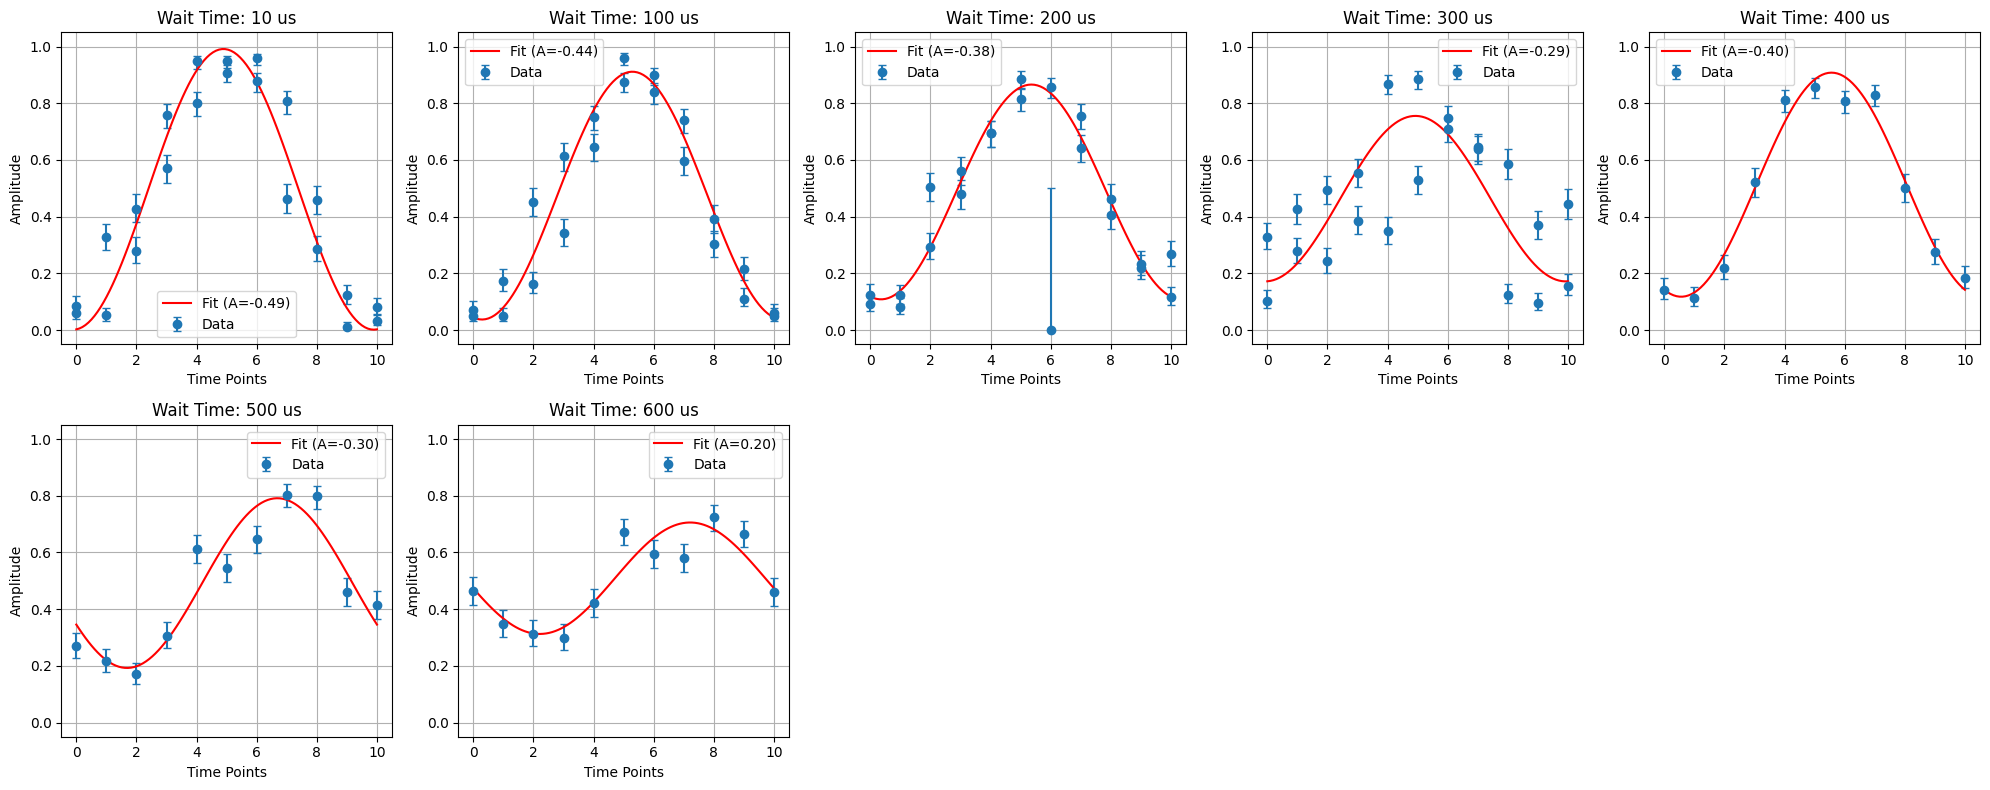


Fitted Results:
Wait Times: [10, 100, 200, 300, 400, 500, 600]
Params: [array([-0.49496875,  0.06684587,  0.49625153]), array([-0.43700359, -0.18230826,  0.47412115]), array([-0.37875589, -0.223959  ,  0.48706638]), array([-0.29182726,  0.04614627,  0.46342549]), array([-0.39514548, -0.35262713,  0.51268606]), array([-0.29931126, -1.05995952,  0.49183867]), array([0.19653779, 1.75283225, 0.50901774])]
Amplitudes: [0.989937506209792, 0.8740071877253331, 0.7575117841717723, 0.5836545197861237, 0.790290954987822, 0.5986225296804889, 0.39307557735473014]
Phases: [0.06684586788593638, -0.18230825595692599, -0.22395900076460085, 0.04614627100972358, -0.3526271261201642, -1.059959521647758, 1.7528322512361554]
Phase Errors: [0.0219768199825674, 0.030105746222015645, 0.03801074771353449, 0.04853427666433773, 0.04807822066470494, 0.0659891440865559, 0.10147064895237659]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from collections import defaultdict

# Fixed frequency: 2π
def sine_function(t, A, phi, offset):
    return A * np.cos(2 * np.pi/10 * t + phi) + offset

def fit_sine_curve(t, ket_data, lower_error, upper_error):
    valid_indices = ~np.isnan(ket_data) & ~np.isnan(lower_error) & ~np.isnan(upper_error)
    t_valid = t[valid_indices]
    ket_data_valid = np.array(ket_data)[valid_indices]
    lower_error_valid = np.array(lower_error)[valid_indices]
    upper_error_valid = np.array(upper_error)[valid_indices]

    sigma = (upper_error_valid + lower_error_valid) / 2.0
    if np.any(sigma <= 0):
        nonzero = sigma[sigma > 0]
        replacement = np.min(nonzero) if len(nonzero) > 0 else 1.0
        sigma[sigma <= 0] = replacement

    # Now we have only three parameters: A, phi, offset
    initial_guess = [
        (np.max(ket_data_valid) - np.min(ket_data_valid))/2,  # amplitude guess
        0,                                                 # phi guess
        np.mean(ket_data_valid)                            # offset guess
    ]

    try:
        params, covariance = curve_fit(
            sine_function,
            t_valid,
            ket_data_valid,
            p0=initial_guess,
            sigma=sigma,
            absolute_sigma=True
        )
        if covariance is not None:
            errors = np.sqrt(np.diag(covariance))
            errors = [err if np.isfinite(err) else None for err in errors]
        else:
            errors = [None] * len(params)

        return params, errors
    except RuntimeError:
        return None, None

def fit_and_plot_wait_times(wait_time_list, ket_data_list, lower_error_list, upper_error_list):
    grouped_data = defaultdict(lambda: {"t": [], "ket_data": [], "lower_error": [], "upper_error": []})

    # Group data by wait time
    for wt, kd, le, ue in zip(wait_time_list, ket_data_list, lower_error_list, upper_error_list):
        if len(kd) == 6:
            t = list(2*np.arange(len(kd)))
        else:
            t = list(range(len(kd)))
        grouped_data[wt]["t"].append(t)
        grouped_data[wt]["ket_data"].append(kd)
        grouped_data[wt]["lower_error"].append(le)
        grouped_data[wt]["upper_error"].append(ue)

    num_plots = len(grouped_data)
    num_columns = 5
    num_rows = (num_plots + num_columns - 1) // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows))
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    fit_wait_times_list = []
    fit_params_list = []
    fit_amplitudes_list = []
    fit_phases_list = []
    fit_phase_errors_list = []

    for i, (wt, data) in enumerate(grouped_data.items()):
        ax = axes[i]

        # Flatten all data for this wait time
        flat_t = [item for sublist in data["t"] for item in sublist]
        flat_ket_data = [item for sublist in data["ket_data"] for item in sublist]
        flat_lower_error = [item for sublist in data["lower_error"] for item in sublist]
        flat_upper_error = [item for sublist in data["upper_error"] for item in sublist]

        flat_t = np.array(flat_t)
        flat_ket_data = np.array(flat_ket_data)
        flat_lower_error = np.array(flat_lower_error)
        flat_upper_error = np.array(flat_upper_error)

        ax.errorbar(
            flat_t,
            flat_ket_data,
            yerr=[flat_lower_error, flat_upper_error],
            fmt='o',
            label='Data',
            capsize=3
        )

        # Fit sine curve
        params, errors = fit_sine_curve(flat_t, flat_ket_data, flat_lower_error, flat_upper_error)
        if params is not None:
            A, phi, offset = params
            list_ts = np.linspace(min(flat_t),max(flat_t),100)
            fit_curve = sine_function(list_ts, A, phi, offset)
            ax.plot(list_ts, fit_curve, color='red', label=f'Fit (A={A:.2f})')

            # Store results
            fit_wait_times_list.append(wt)
            fit_params_list.append(params)
            fit_amplitudes_list.append(2.0 * abs(A))
            fit_phases_list.append(phi)
            fit_phase_errors_list.append(errors[1] if errors else None)

        ax.set_title(f'Wait Time: {wt} us')
        ax.set_xlabel('Time Points')
        ax.set_ylim(-0.05, 1.05)
        ax.set_ylabel('Amplitude')
        ax.grid()
        ax.legend()

    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    return (
        fit_wait_times_list,
        fit_params_list,
        fit_amplitudes_list,
        fit_phases_list,
        fit_phase_errors_list
    )


results = fit_and_plot_wait_times(wait_time_list, ket_data_list, lower_error_list, upper_error_list)
print("\nFitted Results:")
print("Wait Times:", results[0])
print("Params:", results[1])
print("Amplitudes:", results[2])
print("Phases:", results[3])
print("Phase Errors:", results[4])


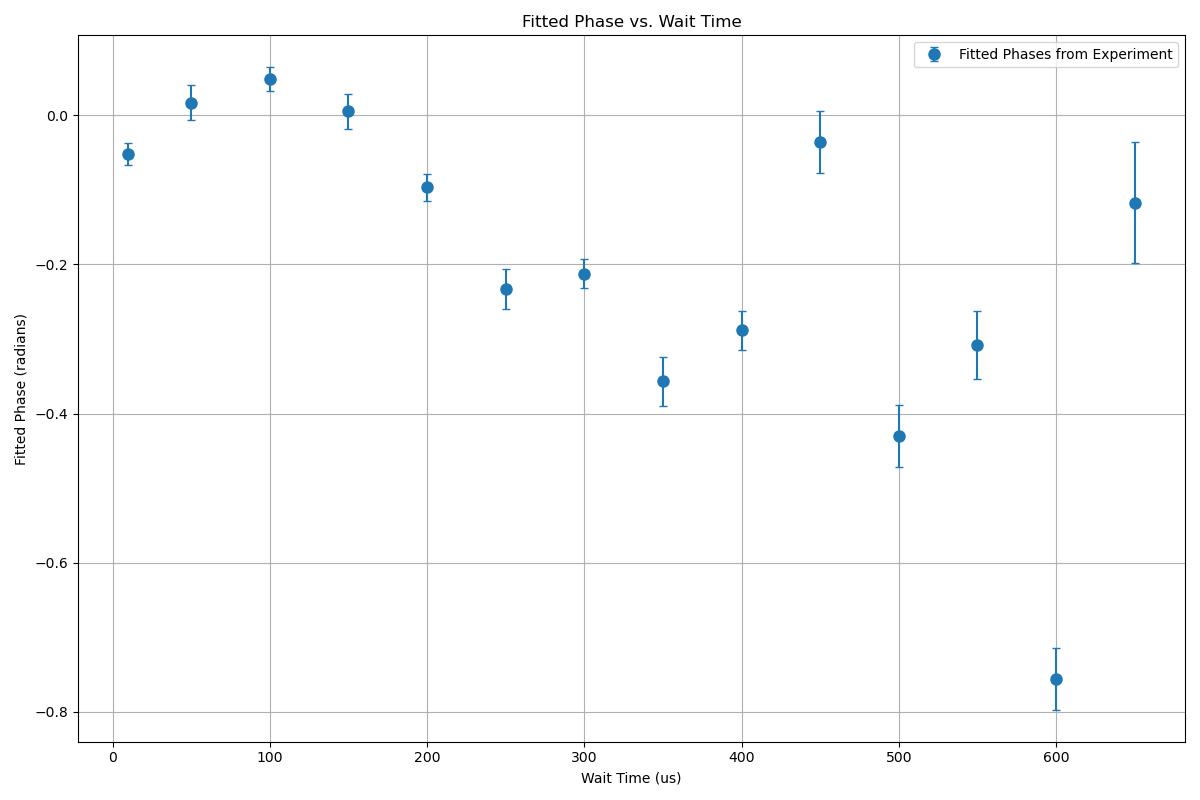

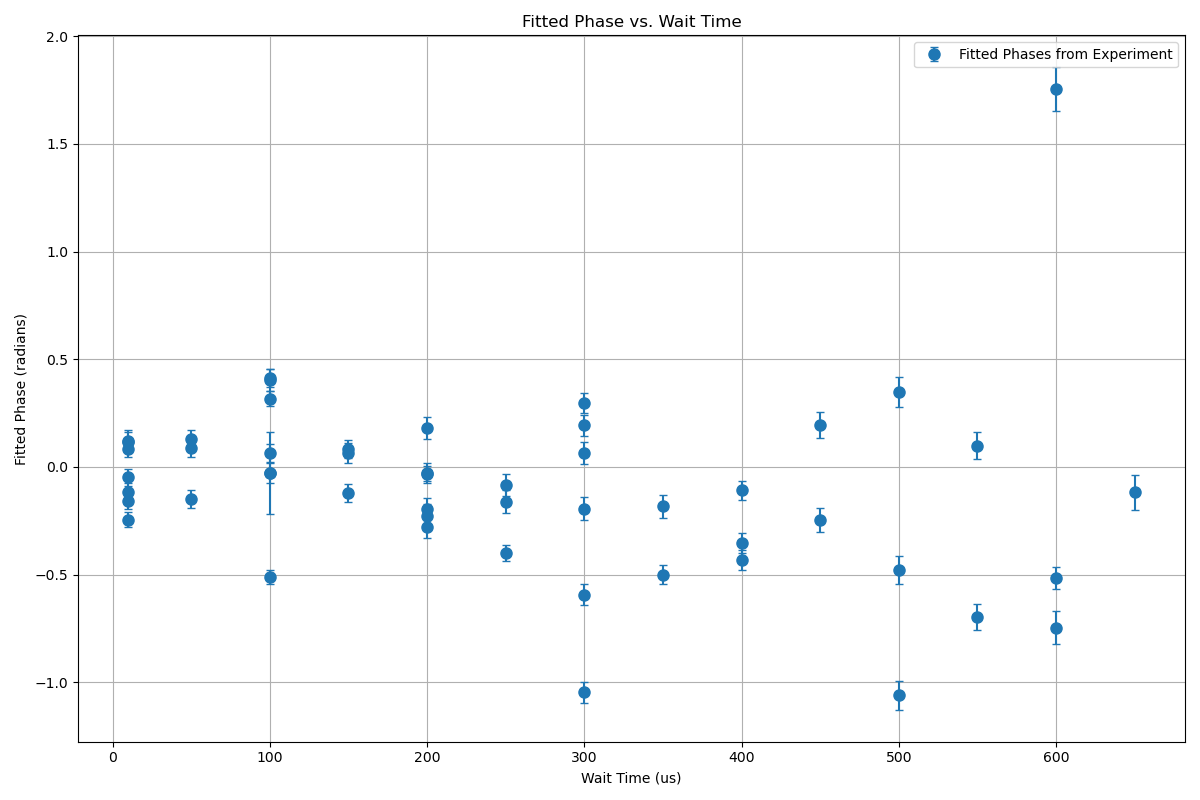

[10, 100, 200, 300, 400, 500, 600, 50, 150, 250, 350, 450, 550, 650] [-0.05251342965309628, 0.048231735243718196, -0.09691442420620569, -0.21265061073731342, -0.28846433936543614, -0.43060812263646264, -0.7553935523073871, 0.01666744982934265, 0.004851519913034079, -0.23309988703758186, -0.35682848960718133, -0.03614978194936829, -0.3077632851478291, -0.11726163083194059] [0.014773528590982573, 0.015651539009283347, 0.018256441233080067, 0.019409177412316316, 0.02644677204632876, 0.0416462990213723, 0.04147337349107374, 0.023888295103593842, 0.023863557088905543, 0.026365949641258445, 0.032933344134699956, 0.04131616042948505, 0.0455253904828196, 0.08160435272129542]


In [22]:
import matplotlib.pyplot as plt

def plot_phase_vs_wait_time_with_errors(fit_wait_times_list, fit_phases_list, fit_phase_errors_list, fmt='o'):
    plt.figure(figsize=(12, 8))
    plt.errorbar(
        fit_wait_times_list,
        fit_phases_list,
        yerr=fit_phase_errors_list,
        fmt=fmt,
        markersize=8,
        capsize=3, label = 'Fitted Phases from Experiment' 
    )
    # phi = np.array([-0.03361680078083345, -0.055504072498464174, -0.09251598028415274, -0.1416052987439629, -0.20455765206456833, -0.28254363639967145, -0.37696067389105287, -0.4897600863335213, -0.621947477257483, -0.7751970356340039, -0.9498414660981058, -1.1480496406288618, -1.3716154891203531])
    # t_wait = [10,50,100,150,200,250,300,350,400,450,500,550,600]
    # plt.plot(t_wait,phi,label = 'Simulated 180Hz Phase Drift')
    plt.xlabel('Wait Time (us)')
    plt.ylabel('Fitted Phase (radians)')
    plt.title('Fitted Phase vs. Wait Time')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_phase_vs_wait_time_with_errors(results[0], results[3], results[4])
plot_phase_vs_wait_time_with_errors(wt_list, fit_phases_list, fit_phase_errors_list)

print(results[0], results[3], results[4])


In [20]:
%matplotlib widget

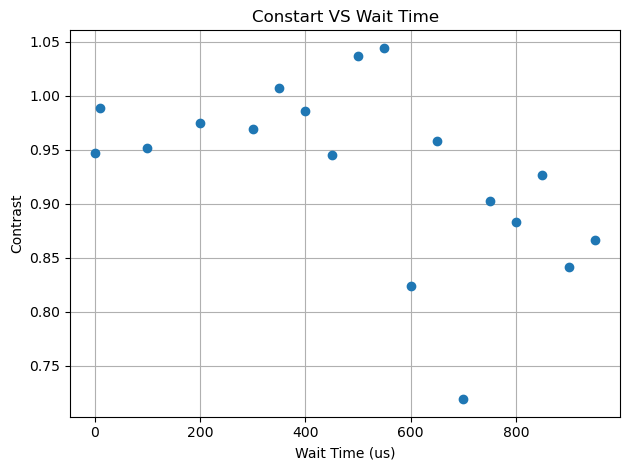

In [21]:
plt.figure()
plt.plot(fit_wait_times_list, fit_amplitudes_list,'o')
plt.xlabel('Wait Time (us)')
plt.ylabel('Contrast')
plt.title('Constart VS Wait Time')
plt.grid(True)
plt.tight_layout()
# plt.legend()
plt.show()

In [20]:
%matplotlib widget

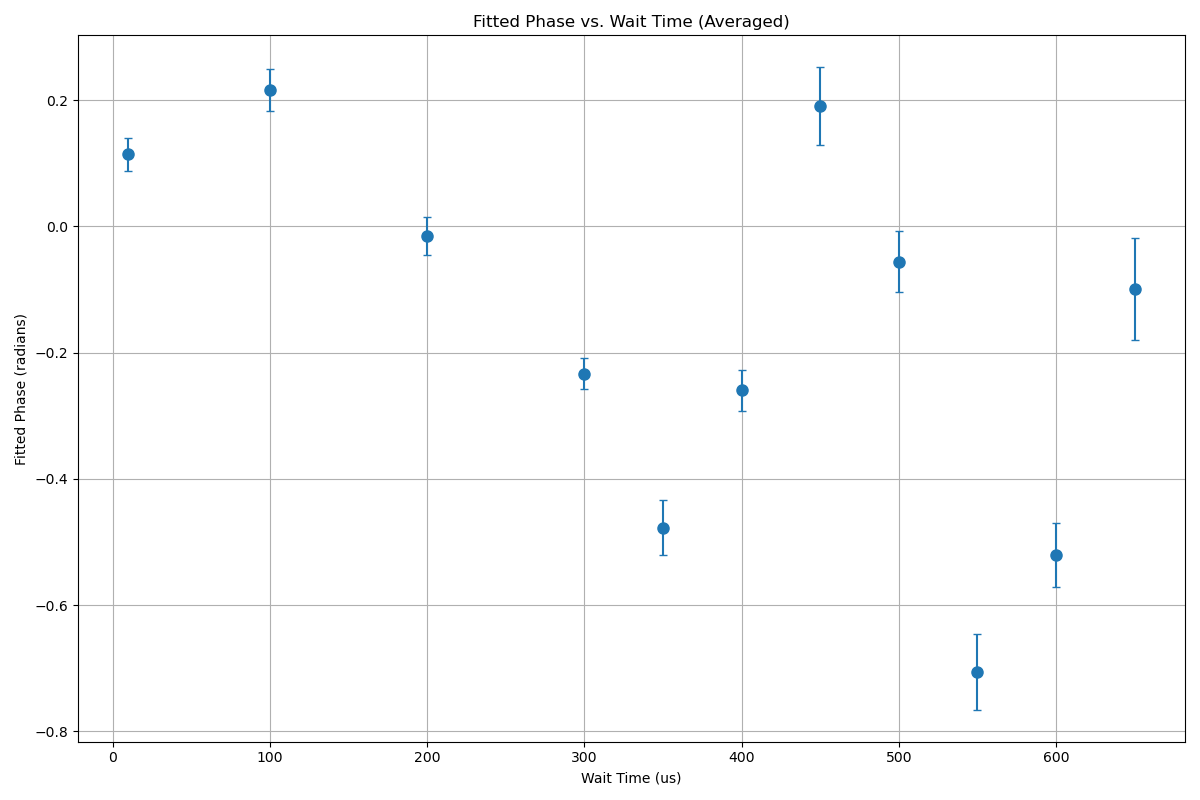

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def average_phases_and_errors(wait_times, phases, phase_errors):
    grouped_data = defaultdict(list)

    # Group phases and errors by wait time
    for wait_time, phase, error in zip(wait_times, phases, phase_errors):
        grouped_data[wait_time].append((phase, error))

    # Calculate averages and errors for each wait time
    unique_wait_times = []
    averaged_phases = []
    combined_errors = []

    for wait_time, values in grouped_data.items():
        unique_wait_times.append(wait_time)
        phases = [v[0] for v in values]
        errors = [v[1] for v in values]

        avg_phase = np.mean(phases)
        avg_error = np.sqrt(np.sum(np.array(errors) ** 2)) / len(errors)

        averaged_phases.append(avg_phase)
        combined_errors.append(avg_error)

    return unique_wait_times, averaged_phases, combined_errors

def plot_phase_vs_wait_time_with_errors(fit_wait_times_list, fit_phases_list, fit_phase_errors_list, fmt='o'):
    # Process data to average phases and errors
    unique_wait_times, averaged_phases, combined_errors = average_phases_and_errors(
        fit_wait_times_list, fit_phases_list, fit_phase_errors_list
    )

    # Plot
    plt.figure(figsize=(12, 8))
    plt.errorbar(
        unique_wait_times,
        averaged_phases,
        yerr=combined_errors,
        fmt=fmt,
        markersize=8,
        capsize=3
    )
    plt.xlabel('Wait Time (us)')
    plt.ylabel('Fitted Phase (radians)')
    plt.title('Fitted Phase vs. Wait Time (Averaged)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_phase_vs_wait_time_with_errors(fit_wait_times_list, fit_phases_list, fit_phase_errors_list)


In [26]:
%matplotlib widget